In [1]:
#!/usr/bin/env python
# encoding: utf-8

import tweepy #https://github.com/tweepy/tweepy
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Twitter API credentials
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

In [3]:
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)

    #initialize a list to hold all the tweepy Tweets
    alltweets = []

    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)

    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1

    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print ("getting tweets before %s" % oldest)

        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)

        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

        print ("...%s tweets downloaded so far" % len(alltweets))

    #transform the tweepy tweets into a 2D array
    outtweets = [[tweet.created_at,tweet.source] for tweet in alltweets]

    return outtweets

# Process One User

In [7]:
def process_user(username):
    all_tweets = get_all_tweets(username)
    df = pd.DataFrame(all_tweets)
    
    user_csv = df.to_csv(username + ".csv")
    
def visualize_user(username):
    user = pd.read_csv(username + ".csv")
    
    hrs = user['0'].str.slice(-8,-6).astype(int)
    mins = user['0'].str.slice(-5,-3).astype(int)
    mins = mins/60
    tottime = hrs+mins
    days = user[:].get('0')
    
    
    ##Plot data##
    
    #DATE VS HRS
    days = user[:].get('0')
    plt.plot(days, tottime[:])
    plt.title('Circadian Rhythms by Tweeting Activity for ' + username)
    plt.xlabel('Dates (Days)')
    plt.ylabel('Hours')
    plt.show()


    #HRS VS DATES: More clear to see user's circadian rhythms
    plt.scatter(tottime[:], days)
    plt.title('Daily Twitter Activity')
    plt.xlabel('Hours')
    plt.ylabel('Days')
    plt.show()

    all_hrs = [0] * 24
    for x in range(len(hrs)):
        curr_hr = hrs[x]
        all_hrs[curr_hr] += 1
        
    plt.title('Frequencies of Tweets')
    plt.xlabel('Hours')
    plt.ylabel('Frequency(Number of Tweets)')
    plt.plot(all_hrs, linewidth=5)


Call function for user to get info

In [9]:
current_user = 'ChipotleTweets'

In [5]:
process_user(current_user)

getting tweets before 1429558369619087363
...400 tweets downloaded so far
getting tweets before 1428807914110611457
...600 tweets downloaded so far
getting tweets before 1428166476435841027
...800 tweets downloaded so far
getting tweets before 1427768599133917186
...1000 tweets downloaded so far
getting tweets before 1427301465882697738
...1200 tweets downloaded so far
getting tweets before 1426358942267940864
...1400 tweets downloaded so far
getting tweets before 1425961506684817411
...1598 tweets downloaded so far
getting tweets before 1425572448531992577
...1798 tweets downloaded so far
getting tweets before 1425475958262439945
...1998 tweets downloaded so far
getting tweets before 1425243281420546049
...2198 tweets downloaded so far
getting tweets before 1424896795306463240
...2398 tweets downloaded so far
getting tweets before 1424454538853945345
...2598 tweets downloaded so far
getting tweets before 1423692226618564608
...2798 tweets downloaded so far
getting tweets before 142301

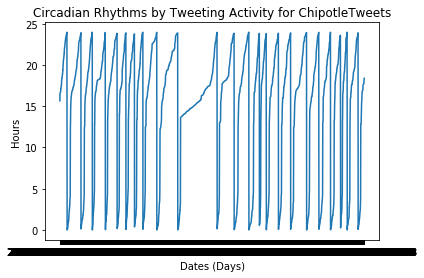

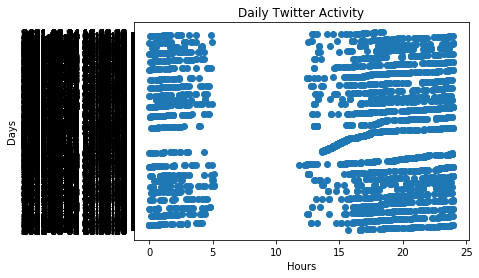

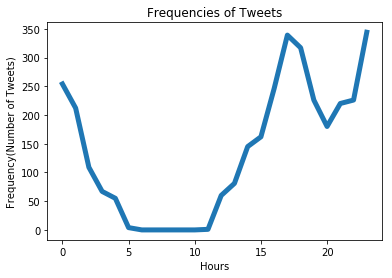

In [10]:
visualize_user(current_user)